In [8]:
import glob
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.utils import np_utils

from matplotlib import pyplot as plt 

In [3]:
le = LabelEncoder()

train = np.empty(shape=(0,128,128,3), dtype=np.int8)
labels = np.empty(shape=(0,2), dtype=np.float)

for f in glob.glob("../data/train_*"):
    print(f)
    train_loader = np.load(f)
    fakes = train_loader['fakes']
    train = np.append(train,fakes,axis=0)
    print('fakes',len(fakes))
    reals = train_loader['reals']
    train = np.append(train,reals,axis=0)
    print('reals',len(reals))
    l = np.append(np.full(len(fakes),'FAKE'),np.full(len(reals),'REAL'))
    l = le.fit_transform(l)
    l = np_utils.to_categorical(l, 2)
    print('labels',labels.ndim,l.ndim)
    labels = np.append(labels,l,axis=0)
    
print('train=',len(train))
print('labels',len(labels))

../data/train_4.npz
fakes 582
reals 576
labels 2 2
../data/train_1.npz
fakes 583
reals 575
labels 2 2
../data/train_3.npz
fakes 572
reals 573
labels 2 2
../data/train_2.npz
fakes 579
reals 575
labels 2 2
train= 4615
labels 4615


In [4]:
labels.nbytes/1024

72.109375

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=42)

In [6]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

3692 923 3692 923


[0. 1.]


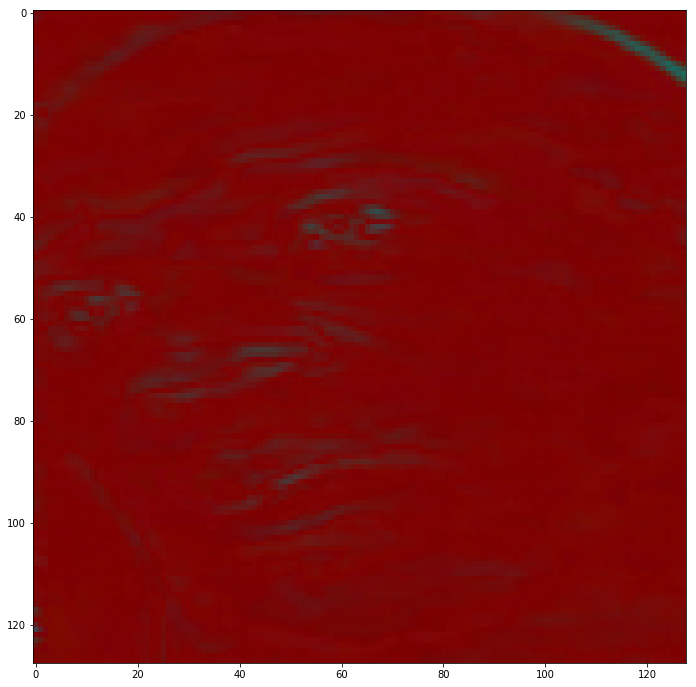

In [33]:
n+=1
print(y_train[n])
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.imshow(X_train[n])

